<a href="https://colab.research.google.com/github/MitPitt/BookViz/blob/main/RussianLiteratureColors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация и анализ цветов русской литературы
Если хотите визуализировать отдельную книгу, запустите блок ниже и идите к последней главе

In [7]:
from IPython.display import clear_output
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import re
import pandas as pd
import time

## Какие цвета пропускаем
skiplist = {'агатова',
 'агатовый',
 'булан',
 'буланый',
 'гнедой',
 'игреневый',
 'караковый',
 'каурый',
 'кипенный',
 'клетчатый',
 'крапчатый',
 'куб',
 'кубовой',
 'кубовый',
 'линялый',
 'муругий',
 'мухортый',
 'мухортых',
 'мышастый',
 'однотонный',
 'опаловый',
 'палево',
 'палевый',
 'пегий',
 'полова',
 'половый',
 'пятнистый',
 'рус',
 'русоволосый',
 'русый',
 'рябенький',
 'рябоватый',
 'саврасый',
 'сивый',
 'смуглявый',
 'соловый',
 'чалый',
 'чубарый',
 'электрик'}
## Словоформы в лемму
color_dictionary = {'ала': 'алый',
 'алей': 'алый',
 'аленька': 'алый',
 'аленький': 'алый',
 'алы': 'алый',
 'алый': 'алый',
 'аметистов': 'аметистовый',
 'аметистова': 'аметистовый',
 'аметистовый': 'аметистовый',
 'багров': 'багровый',
 'багроветь': 'багровый',
 'багровый': 'багровый',
 'багрянеть': 'багровый',
 'багряный': 'багровый',
 'бежевый': 'бежевый',
 'бел': 'белый',
 'белая': 'белый',
 'белейший': 'белый',
 'беленький': 'белый',
 'белесоватый': 'белый',
 'белесый': 'белый',
 'беловато-зеленый': 'зеленый',
 'беловатый': 'белый',
 'белоснежный': 'белый',
 'белые': 'белый',
 'белый': 'белый',
 'бель': 'белый',
 'бесцветность': 'цветной',
 'бесцветный': 'цветной',
 'бирюзова': 'бирюзовый',
 'бирюзовый': 'бирюзовый',
 'бледненький': 'бледный',
 'бледно-голубой': 'голубой',
 'бледно-лиловый': 'лиловый',
 'бледность': 'бледный',
 'бледный': 'бледный',
 'блекло-синий': 'синий',
 'бордо': 'бордовый',
 'бордовый': 'бордовый',
 'бур': 'бурый',
 'бура': 'бурый',
 'бурый': 'бурый',
 'буря': 'бурый',
 'ворон': 'черный',
 'ворона': 'черный',
 'вороной': 'черный',
 'голуба': 'голубой',
 'голубенький': 'голубой',
 'голубовато-зеленый': 'зеленый',
 'голубоватый': 'голубой',
 'голубой': 'голубой',
 'голубь': 'голубой',
 'грязно-белый': 'белый',
 'грязно-зеленый': 'зеленый',
 'грязновато-белый': 'белый',
 'двухцветный': 'цветной',
 'дымчатый': 'серый',
 'желтенький': 'желтый',
 'желто-зеленый': 'зеленый',
 'желто-синий': 'синий',
 'желтовато-зеленый': 'зеленый',
 'желтоватый': 'желтый',
 'желтый': 'желтый',
 'желть': 'желтый',
 'жемчужно-белый': 'белый',
 'зелененький': 'зеленый',
 'зелено-желтый': 'желтый',
 'зелено-синий': 'синий',
 'зеленовато-голубой': 'голубой',
 'зеленовато-желтый': 'желтый',
 'зеленовато-синий': 'синий',
 'зеленоватый': 'зеленый',
 'зеленый': 'зеленый',
 'зелень': 'зеленый',
 'златой': 'золотой',
 'золотистый': 'золотой',
 'изумрудно-зеленый': 'зеленый',
 'изумрудный': 'изумрудный',
 'карий': 'коричневый',
 'карим': 'коричневый',
 'кария': 'коричневый',
 'кирпично-красный': 'красный',
 'коричневато-зеленый': 'зеленый',
 'коричневатый': 'коричневый',
 'коричневеть': 'коричневый',
 'коричневый': 'коричневый',
 'красненек': 'красный',
 'красненькая': 'красный',
 'красненький': 'красный',
 'краснеть': 'красный',
 'красно-синий': 'синий',
 'красновато-желтый': 'желтый',
 'красновато-лиловый': 'лиловый',
 'красновато-синий': 'синий',
 'красноватый': 'красный',
 'красный': 'красный',
 'красных': 'красный',
 'лазорев': 'лазурный',
 'лазоревый': 'лазурный',
 'лазурно-голубой': 'голубой',
 'лазурный': 'лазурный',
 'лилов': 'лиловый',
 'лилова': 'лиловый',
 'лиловато': 'лиловый',
 'лиловатый': 'лиловый',
 'лилово-синий': 'синий',
 'лиловый': 'лиловый',
 'лимонно-желтый': 'желтый',
 'малахитовый': 'изумрудный',
 'медно-красный': 'красный',
 'молочно-белый': 'белый',
 'мутнеть': 'мутный',
 'мутно': 'мутный',
 'мутный': 'мутный',
 'небелый': 'белый',
 'небесно-голубой': 'голубой',
 'нежно-белый': 'белый',
 'нежно-голубой': 'голубой',
 'нежно-розовый': 'розовый',
 'огненно-красный': 'красный',
 'одноцветный': 'цветной',
 'оранжево-желтый': 'желтый',
 'оранжево-розовый': 'розовый',
 'оранжевый': 'оранжевый',
 'пестренький': 'пестрый',
 'пестрый': 'пестрый',
 'побелелый': 'белый',
 'побледнеть': 'бледный',
 'поблеклый': 'тусклый',
 'пожелтелый': 'желтый',
 'позеленелый': 'зеленый',
 'позеленеть': 'зеленый',
 'покраснелый': 'красный',
 'порозоветь': 'розовый',
 'порыжелый': 'рыжий',
 'порыжеть': 'рыжий',
 'поседелый': 'серый',
 'посинелый': 'синий',
 'посинеть': 'синий',
 'потускнелый': 'тусклый',
 'почернелый': 'черный',
 'пунцоветь': 'пунцовый',
 'пунцовый': 'пунцовый',
 'пурпурный': 'пурпурный',
 'пурпуровый': 'пурпурный',
 'разноцветный': 'цветной',
 'розов': 'розовый',
 'розова': 'розовый',
 'розовато-лиловый': 'лиловый',
 'розоватый': 'розовый',
 'розовенький': 'розовый',
 'розоветь': 'розовый',
 'розовый': 'розовый',
 'румяна': 'румяный',
 'румяненький': 'румяный',
 'румяный': 'румяный',
 'рыжебородый': 'рыжий',
 'рыжеватый': 'рыжий',
 'рыжеволосый': 'рыжий',
 'рыженький': 'рыжий',
 'рыжий': 'рыжий',
 'самоцветный': 'цветной',
 'светленький': 'светлый',
 'светло-голубой': 'голубой',
 'светло-желтый': 'желтый',
 'светло-зеленый': 'зеленый',
 'светло-лиловый': 'лиловый',
 'светло-оранжевый': 'оранжевый',
 'светло-розовый': 'розовый',
 'светло-синий': 'синий',
 'светлый': 'светлый',
 'седенький': 'серый',
 'седоватый': 'серый',
 'сера': 'серый',
 'серебристо-белый': 'белый',
 'серебристый': 'серебряный',
 'серенький': 'серый',
 'серенько': 'серый',
 'серо-буро-малиновый': 'малиновый',
 'серо-голубой': 'голубой',
 'серо-зеленый': 'зеленый',
 'серо-синий': 'синий',
 'серовато-белый': 'белый',
 'серовато-голубой': 'голубой',
 'серовато-зеленый': 'зеленый',
 'серовато-синий': 'синий',
 'сероватый': 'серый',
 'серый': 'серый',
 'сизеть': 'сизый',
 'сизо': 'сизый',
 'сизоватый': 'сизый',
 'сизокрылый': 'сизый',
 'сизый': 'сизый',
 'сине-зеленый': 'зеленый',
 'синеватый': 'синий',
 'синенький': 'синий',
 'синий': 'синий',
 'сиреневатый': 'сиреневый',
 'сумрачно': 'темный',
 'сумрачный': 'темный',
 'темненький': 'темный',
 'темнешенький': 'темный',
 'темно-бордовый': 'бордовый',
 'темно-голубой': 'голубой',
 'темно-желтый': 'желтый',
 'темно-зеленый': 'зеленый',
 'темно-красный': 'красный',
 'темно-лиловый': 'лиловый',
 'темно-оранжевый': 'оранжевый',
 'темно-розовый': 'розовый',
 'темно-синий': 'синий',
 'темноватый': 'темный',
 'темный': 'темный',
 'травянисто-зеленый': 'зеленый',
 'трехцветный': 'цветной',
 'тускло-зеленый': 'зеленый',
 'тускло-синий': 'синий',
 'фиолетово-голубой': 'голубой',
 'фиолетовый': 'фиолетовый',
 'хаки': 'бежевый',
 'цветастый': 'цветной',
 'цветень': 'цветной',
 'цветной': 'цветной',
 'червленый': 'багровый',
 'черненький': 'черный',
 'чернехонький': 'черный',
 'чернешенький': 'черный',
 'черно-белый': 'белый',
 'черно-бурый': 'бурый',
 'черно-синий': 'синий',
 'черноватый': 'черный',
 'черноволосый': 'черный',
 'черноголовый': 'черный',
 'черномаз': 'черный',
 'черномазый': 'черный',
 'черный': 'черный',
 'черных': 'черный',
 'ядовито-зеленый': 'зеленый',
 'ядовито-синий': 'синий',
 'ярко-голубой': 'голубой',
 'ярко-желтый': 'желтый',
 'ярко-зеленый': 'зеленый',
 'ярко-красный': 'красный',
 'ярко-лиловый': 'лиловый',
 'ярко-оранжевый': 'оранжевый',
 'ярко-розовый': 'розовый',
 'ярко-синий': 'синий',
 'яркокрасный': 'красный'}
## Название цвета в его значение
color_HEX_dictionary = {
    'алый': '#ff2400',
    'аметистовый': '#9966cc',
    'багровый': '#8c000f',
    'бежевый': '#f5f5dc',
    'белый': '#ffffff',
    'бирюзовый': '#30d5c8',
    'бледный': None,
    'бордовый': '#9b2d30',
    'бурый': '#45161c',
    'голубой': '#42aaff',
    'желтый': '#ffff00',
    'зеленый': '#008000',
    'золотой': '#ffd700',
    'изумрудный': '#50c878',
    'коричневый': '#964b00',
    'красный': '#ff0000',
    'лазурный': '#007fff',
    'лиловый': '#db7093',
    'малиновый': '#dc143c',
    'мутный': '#886806', #Мутно-коричневый
    'оранжевый': '#ffa500',
    'пестрый': None,
    'пунцовый': '#ff2080',
    'пурпурный': '#800080',
    'розовый': '#fc3fcd', 
    'румяный': '#ffc0cb',
    'рыжий': '#d77d31',
    'светлый': '#d4d4d4', 
    'серебряный': '#c0c0c0',
    'серый': '#808080',
    'сизый': '#79a0c1',
    'синий': '#0000ff',
    'сиреневый': '#c8a2c8',
    'темный': '#49423d', #Тёмно-серый
    'тусклый': '#696969', #Тусклый серый
    'фиолетовый': '#8b00ff',
    'цветной': None,
    'черный': '#000000'
    }

def lemmatize(ccolor):
    color = ccolor.replace('ё','е').lower()
    if (ccolor not in color_dictionary.keys()) and (ccolor not in skiplist):
          clear_output(wait=True)
          print(color, '— Этой словоформы цвета пока нет в словаре. Добавить или пропустить?')
          print('Сейчас есть такие, но можно добавить и новый:', set(color_dictionary.values()))
          command=""
          if ('-' in color) and (color.split('-')[-1] in color_dictionary.keys()):
            command = color_dictionary[color.split('-')[-1]]
          elif 'крас' in color: command='красный'
          elif 'син' in color: command='синий'
          elif 'желт' in color: command='желтый'
          elif 'зеле' in color: command='зеленый'
          elif 'голуб' in color: command='голубой'
          elif 'бел' in color: command='белый'
          elif 'черн' in color: command='черный'
          elif 'пурпу' in color: command='пурпурный'
          elif 'фиоле' in color: command='фиолетовый'
          elif 'рыж' in color: command='рыжий'
          elif 'сиз' in color: command='сизый'
          elif 'бирюз' in color: command='бирюзовый'
          elif 'лило' in color: command='лиловый'
          elif 'малин' in color: command='малиновый'
          elif 'румян' in color: command='румяный'
          elif 'золот' in color: command='золотой'
          elif 'злат' in color: command='золотой'
          elif 'бур' in color: command='бурый'
          elif 'багр' in color: command='багровый'
          elif 'борд' in color: command='бордовый'
          elif 'ален' in color: command='алый'
          elif 'ало' in color: command='алый'
          elif 'червон' in color: command='алый'
          elif 'червл' in color: command='багровый'
          elif 'сирен' in color: command='сиреневый'
          elif 'лаз' in color: command='лазурный'
          elif 'роз' in color: command='розовый'
          elif 'оранж' in color: command='оранжевый'
          elif 'корич' in color: command='коричневый'
          elif 'беж' in color: command='бежевый'
          elif 'пунц' in color: command='пунцовый'
          elif 'сереб' in color: command='серебряный'
          elif 'аметис' in color: command='аметистовый'
          elif 'изумр' in color: command='изумрудный'
          elif 'кар' in color: command='коричневый'
          elif 'темн' in color: command='темный'
          elif 'свет' in color: command='светлый'
          elif 'блед' in color: command='бледный'
          elif 'пестр' in color: command='пестрый'
          elif 'туск' in color: command='тусклый'
          elif 'мутн' in color: command='мутный'
          elif 'цвет' in color: command='цветной'
          elif 'туск' in color: command='тусклый'
          elif 'сер' in color: command='серый'
          elif 'ворон' in color: command='черный'
          elif 'блек' in color: command='тусклый'
          elif 'сед' in color: command='серый'
          elif 'сумр' in color: command='темный'
          elif 'агат' in color: command='-'
          elif 'рус' in color: command='-'
          elif 'булан' in color: command='-'
          elif 'гнед' in color: command='-'
          elif 'игрен' in color: command='-'
          elif 'каур' in color: command='-'
          elif 'сивы' in color: command='-'
          elif 'ряб' in color: command='-'
          elif 'бул' in color: command='-'
          elif 'солов' in color: command='-'
          elif 'муруг' in color: command='-'
          elif 'пег' in color: command='-'
          elif 'сив' in color: command='сизый'
          elif 'ал' in color: command='алый'
          elif 'клет' in color: command='-'
          elif 'пол' in color: command='-'
          elif 'дым' in color: command='-'
          elif 'крап' in color: command='-'
          elif 'пятн' in color: command='-'
          elif 'саврас' in color: command='-'
          elif 'куб' in color: command='-'
          elif 'лин' in color: command='-'
          if command != "":
            print('автоматически определено')
          while command=="":
            command = input('Введите лемму-цвет или "-" чтобы пропустить:').lower()
          if command == '-':
            skiplist.add(color)
          else:
            color_dictionary[ccolor] = command


# Скрапинг корпуса
первая страница -> получаем необработанный список

In [87]:
# Идти в "Все примеры" каждой книги на странице
# Использовать, если в книге много примеров цветов

def parse_book(book_url):
  book_word_freq = dict()
  
  html = None
  while html is None:
    try:
      html = urlopen(book_url).read().decode('utf-8')
    except HTTPError:
      print('=== 429 ===')
      time.sleep(7)

  try:
    soup = BeautifulSoup(html, "lxml")
    book_name = soup.find("span", class_="b-doc-expl").text
    table = soup.find_all("table", border="1")[1]
    book_word_freq['BookTitle'] = book_name

    for row in table.findAll('tr'):
      tds = row.findAll('td')
      if len(tds) == 3:
        num = int(tds[2].text)
        color = tds[1].text.lower().replace('ё','е')
        #print(color, num)
        lemmatize(color)
        if (color not in skiplist):
          col = color_dictionary[color]
          book_word_freq.setdefault(col, 0)
          book_word_freq[col] += num
  except:
    return None

  if len(book_word_freq) <= 1:
    return None
  return book_word_freq

def parse_page(page_url, booklist):
  html = urlopen(page_url).read().decode('utf-8')
  soup = BeautifulSoup(html, "lxml")
  book_list = ['https://processing.ruscorpora.ru/'+i['href'] for i in soup.find_all('a', string=re.compile('Все примеры'))]
  for link in book_list:
    book_word_freq = parse_book(link)
    if book_word_freq is not None:
      booklist.append(book_word_freq)
      print(book_word_freq)
  next_page = 'https://processing.ruscorpora.ru' + soup.find('a', string=re.compile('следующая страница'))['href']
  return next_page

def parse_all(starting_url, booklist):
  i=0
  while True:
    clear_output(True)
    i+=1
    print('page', i)
    print(starting_url)
    starting_url = parse_page(starting_url, booklist)
    time.sleep(2)

# Не углубляться во все примеры
# Подходит, если в книге немного цветов, для стихов, например, т.к. они небольшие

def parse_poetry_page(page_url, booklist):
  html = None
  while html is None:
    try:
      html = urlopen(page_url).read().decode('utf-8')
    except HTTPError:
      print('=== 429 ===')
      time.sleep(7)
  soup = BeautifulSoup(html, "lxml")

  for i in soup.find_all('span', class_='b-doc-expl'):
    book_word_freq = dict()
    title = i.text
    book_word_freq['BookTitle'] = title
    colors = []
    for c in i.parent.find_all('span', class_='b-wrd-expl g-em'):
      c = c.text.lower().replace('ё', 'е')
      lemmatize(c)
      if (c not in skiplist):
        col = color_dictionary[c]
        book_word_freq.setdefault(col, 0)
        book_word_freq[col] += 1
    if len(book_word_freq) > 1:
      booklist.append(book_word_freq)
      print(book_word_freq)
  next_page = 'https://processing.ruscorpora.ru' + soup.find('a', string=re.compile('следующая страница'))['href']
  return next_page

def parse_all_poetry(starting_url, booklist):
  i=0
  while True:
    clear_output(True)
    i+=1
    print('page', i)
    print(starting_url)
    starting_url = parse_poetry_page(starting_url, booklist)

In [88]:
# first page
starting_url_poetry = "https://processing.ruscorpora.ru/search.xml?env=alpha&mycorp=&mysent=&mysize=12407747&mysentsize=0&mydocsize=89124&dpp=50&spp=50&spd=10&text=lexgramm&mode=poetic&lang=ru&sort=i_grtagging&ext=10&nodia=1&parent1=0&level1=0&lex1=&gramm1=&flags1=&sem1=t%3Aphysq%3Acolor&parent2=0&level2=0&min2=1&max2=1&lex2=&gramm2=&flags2=&sem2="
starting_url_fiction = "https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=JSONeyJkb2Nfc3BoZXJlIjogWyLRhdGD0LTQvtC20LXRgdGC0LLQtdC90L3QsNGPIl19&mysent=&mysize=139292338&mysentsize=0&dpp=50&spp=50&spd=10&mydocsize=9798&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&lex1=&gramm1=&sem1=t%3Aphysq%3Acolor&flags1=&sem-mod1=sem&sem-mod1=sem2&parent2=0&level2=0&min2=1&max2=1&lex2=&gramm2=&sem2=&flags2=&sem-mod2=sem&sem-mod2=sem2"

In [ ]:
booklist = []
parse_all_poetry(starting_url_poetry, booklist)
# Корпус может часто застревать ближе к 300 странице и случайно выдавать пустую страницу, что приводит к концу-ошибке
# В таком случае перезапустите parse_all_poetry на последнем высвеченном url
# А также закомментите строку booklist = [], чтобы сохранить прогресс

In [203]:
df = pd.DataFrame(booklist).fillna(0)
df.head()

,BookTitle,белый,темный,красный,желтый,зеленый,цветной,черный,синий,бурый,голубой,румяный,серый,мутный,фиолетовый,алый,багровый,бледный,коричневый,светлый,розовый,бежевый,сизый,лиловый,золотой,рыжий,оранжевый,серебряный,изумрудный,лазурный,пунцовый,бирюзовый,пестрый,аметистовый,тусклый,бордовый,пурпурный,сиреневый,малиновый
0,О. Г. Чухонцев. «55-й (приписка к снимку)…» | ...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"О. Г. Чухонцев. «А, те розаны Назарета...» (2016)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"О. Г. Чухонцев. «Вот и дожили мы, китайцы...» ...",0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"О. Г. Чухонцев. «Комарик, подцепившись под лис...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,О. Г. Чухонцев. «Маршак угощал меня чаем с печ...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
df.to_csv('poet0.csv', index=False)

# Обработка данных


In [431]:
import pandas as pd
unprocessed_data = '/content/poet0.csv'
df =  pd.read_csv(unprocessed_data)
df = df.drop_duplicates('BookTitle')
book_dict = df.to_dict(orient='records')

In [432]:
import re

# обработка названий книг в года
def parse_title(book, yeardict):    
    name = book.pop('BookTitle')
    interval = re.findall(r'\d{4}-\d{4}', name)
    singles = re.findall(r'\d{4}', name)
    bracketyear = re.findall(r'\(\d{4}\)', name)
    
    years = []
    if bracketyear:
        y = int(bracketyear[-1][1:-1])
        if y < 2020:
          years.append(y)
        elif singles:
          years.append(int(singles[-1]))
    elif interval:
        y1 = int(interval[0][:4])
        y2 = int(interval[0][-4:])
        if y2 > y1:
            #years = [(y2+y1)//2]
            years = [i for i in range(y1, y2+1)]
        else:
            years = [y1]
    elif singles:
        years.append(int(singles[-1]))

    for y in years:
      if y>2020 or y<1700:
        print(name)
      yeardict.setdefault(y,dict())
      yeardict[y]['Year']=y
      yeardict[y].setdefault('Amount',0)
      yeardict[y]['Amount']+= 1/len(years)
      for c in book.keys():
        yeardict[y].setdefault(c, 0)
        yeardict[y][c] += book[c]

    return years

In [433]:
yeardict = dict()

for book in book_dict:
  parse_title(book, yeardict)

newdf = pd.DataFrame([y for y in yeardict.values()]).sort_values('Year') 

In [434]:
# Можно сохранить, если хотите изучить данные где-то еще
newdf.to_csv(unprocessed_data.replace('.csv','')+'_processed.csv', index=False)
newdf.head()

,Year,Amount,белый,темный,красный,желтый,зеленый,цветной,черный,синий,бурый,голубой,румяный,серый,мутный,фиолетовый,алый,багровый,бледный,коричневый,светлый,розовый,бежевый,сизый,лиловый,золотой,рыжий,оранжевый,серебряный,изумрудный,лазурный,пунцовый,бирюзовый,пестрый,аметистовый,тусклый,бордовый,пурпурный,сиреневый,малиновый
303,1705,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,1714,0.052632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,1715,0.052632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,1716,0.052632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,1717,0.052632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Визуализация и анализ обработанных данных

In [616]:
# какие цвета хотим отобразить и в каком порядке
col_names = [#'бледный', #'цветной', 'пестрый' 
             'черный',
             'темный', 
             'серый',
             'тусклый',
             'светлый', 
             'серебряный',
             'белый',
             'румяный', 'малиновый', 'алый', 'пунцовый', 'красный', 'бордовый', 'багровый', 'бурый',
             'оранжевый', 'рыжий', 'коричневый', 'мутный',
             'желтый', 'золотой', 'бежевый', 
             'зеленый', 'изумрудный', 'бирюзовый',
             'лазурный', 'голубой', 'сизый',
             'синий',
             'лиловый', 'фиолетовый', 'аметистовый', 'пурпурный', 'розовый', 'сиреневый'
             ]
  
col_names.reverse()

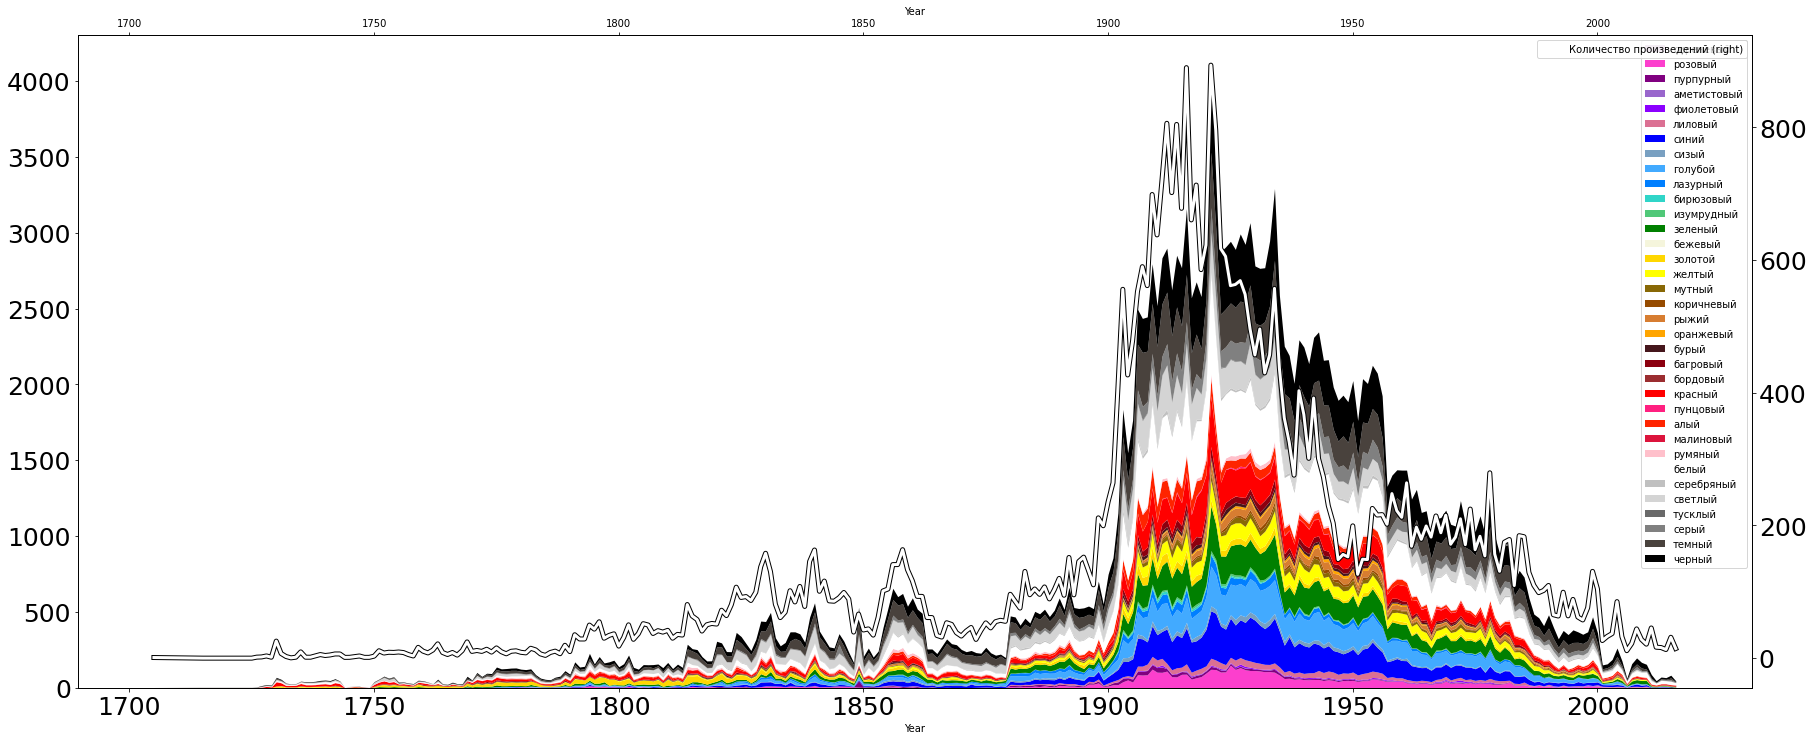

In [617]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 12

fig, ax = plt.subplots()
newdf.plot.area(x='Year', y=col_names, color=[color_HEX_dictionary.get(x) for x in col_names], stacked=True, ax=ax, linewidth=0.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax2 = ax.twiny()
newdf.plot(x='Year', color='black', y='Amount', ax=ax2, secondary_y=True, linewidth=5.0, label='Количество произведений')
newdf.plot(x='Year', color='white', y='Amount', ax=ax2, secondary_y=True, linewidth=3.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
plt.show()

In [624]:
#col_names = ['бледный', 'румяный']
findf = newdf.copy()
findf[col_names] = findf[col_names].rolling(window=10).mean()
findf[col_names] = findf[col_names].div(findf[col_names].sum(axis=1), axis=0)
findf.dropna(how='any', inplace=True)
findf.head()

,Year,Amount,белый,темный,красный,желтый,зеленый,цветной,черный,синий,бурый,голубой,румяный,серый,мутный,фиолетовый,алый,багровый,бледный,коричневый,светлый,розовый,бежевый,сизый,лиловый,золотой,рыжий,оранжевый,серебряный,изумрудный,лазурный,пунцовый,бирюзовый,пестрый,аметистовый,тусклый,бордовый,пурпурный,сиреневый,малиновый
296,1722,0.052632,0.0,0.344828,0.034483,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.620690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,1723,0.052632,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,1724,0.052632,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,1725,0.052632,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,1726,1.552632,0.0,0.303030,0.060606,0.0,0.0,0.0,0.030303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


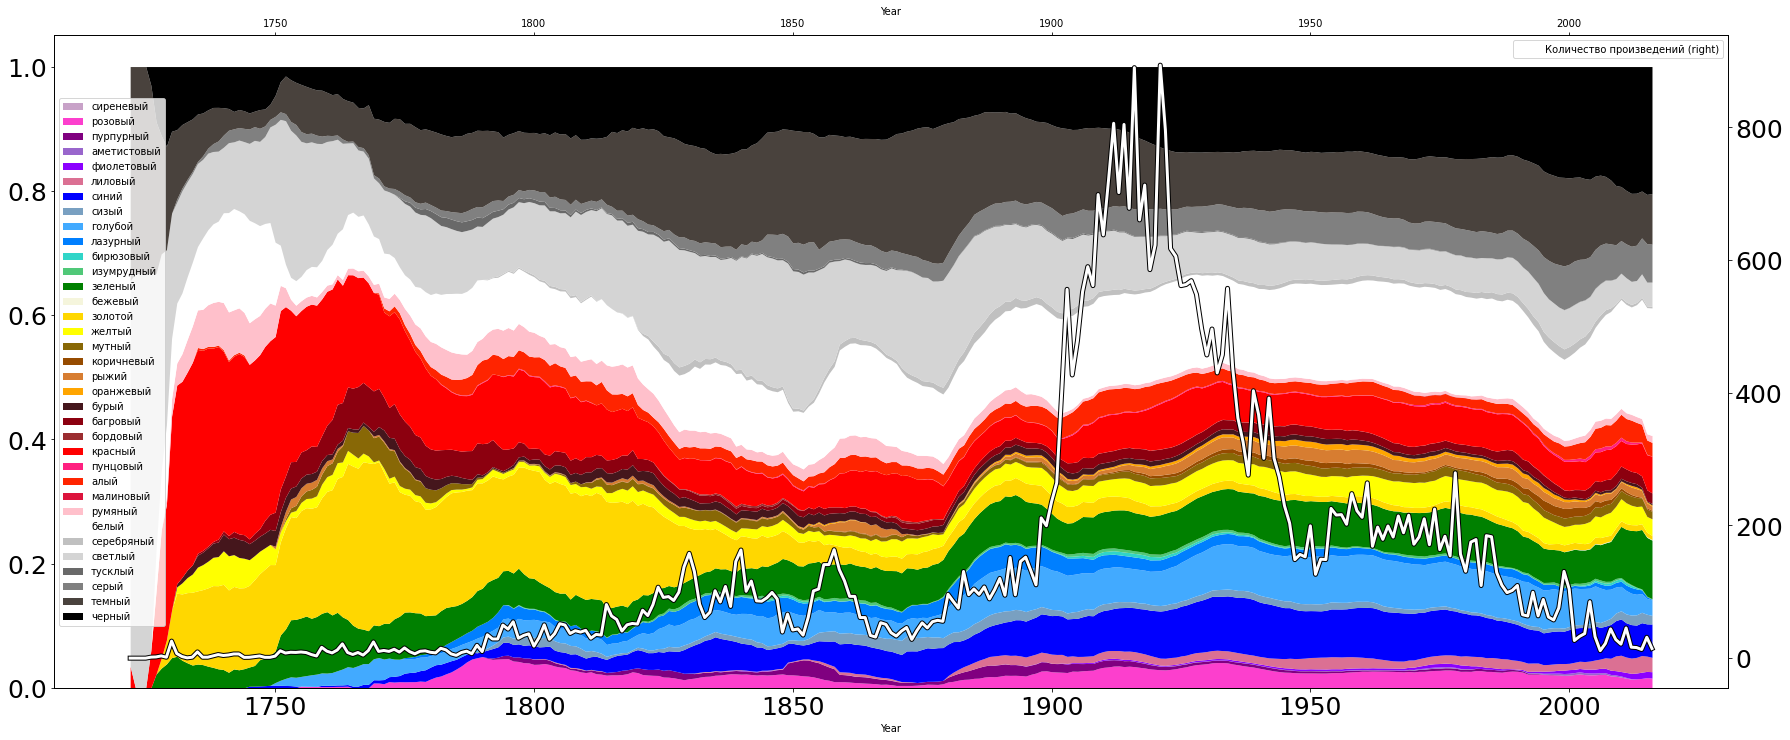

In [625]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 12

fig, ax = plt.subplots()
findf.plot.area(x='Year', y=col_names, color=[color_HEX_dictionary.get(x) for x in col_names], stacked=True, ax=ax, linewidth=0.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax2 = ax.twiny()
findf.plot(x='Year', color='black', y='Amount', ax=ax2, secondary_y=True, linewidth=5.0, label='Количество произведений')
findf.plot(x='Year', color='white', y='Amount', ax=ax2, secondary_y=True, linewidth=3.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
plt.show()

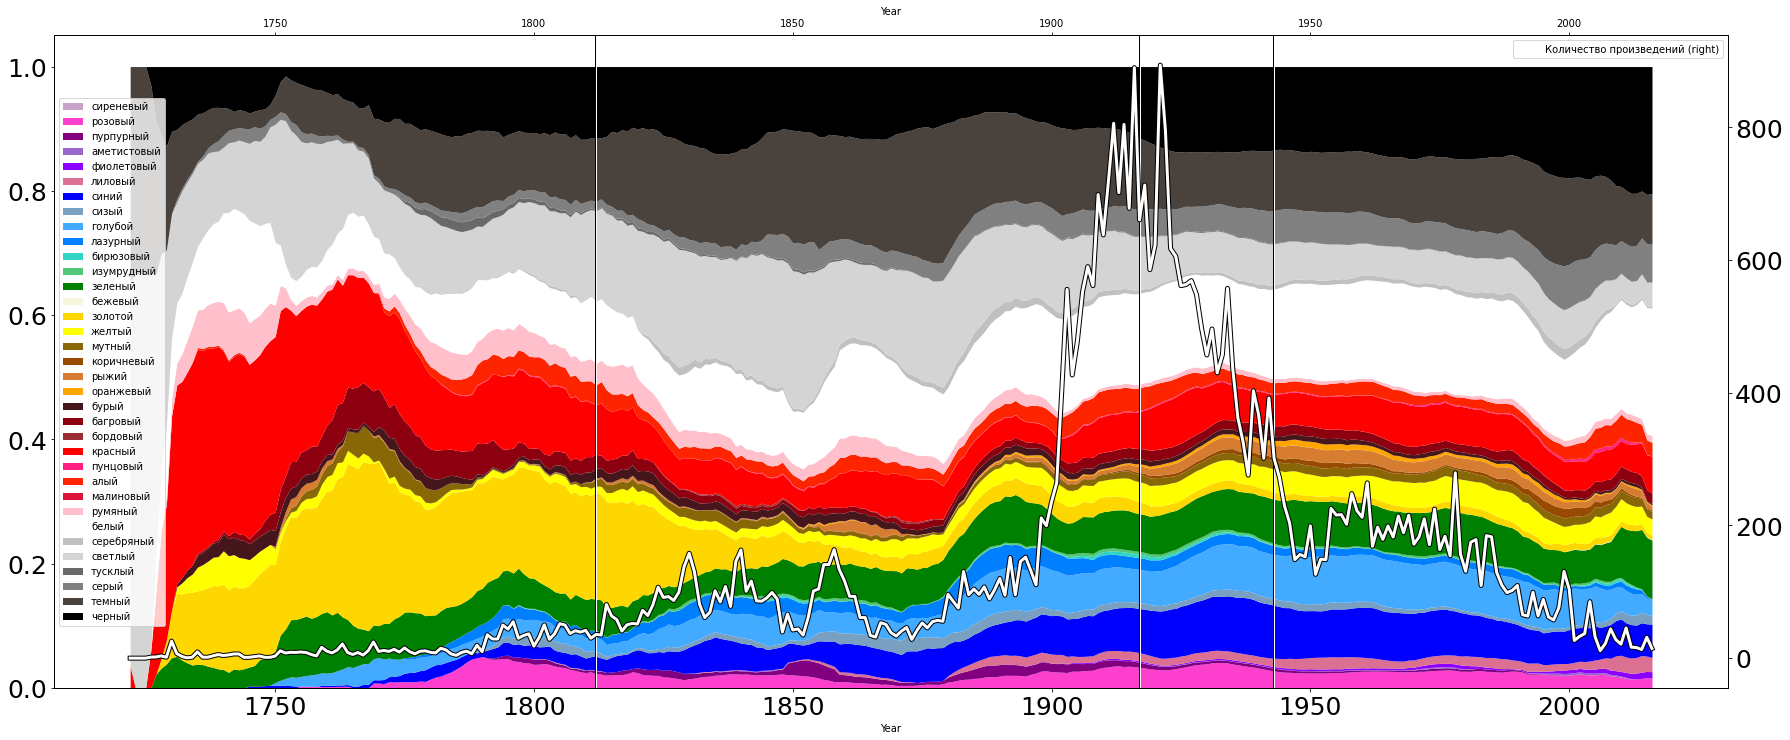

In [630]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 12

fig, ax = plt.subplots()
findf.plot.area(x='Year', y=col_names, color=[color_HEX_dictionary.get(x) for x in col_names], stacked=True, ax=ax, linewidth=0.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax2 = ax.twiny()
findf.plot(x='Year', color='black', y='Amount', ax=ax2, secondary_y=True, linewidth=5.0, label='Количество произведений')
findf.plot(x='Year', color='white', y='Amount', ax=ax2, secondary_y=True, linewidth=3.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

Major_Events = [
                1812, # отечественная война
                1917, # первая мировая и революция
                1943, # вторая мировая
]
for year in Major_Events:
  ax.axvline(x=year, color='black', linewidth=2.0)
  ax.axvline(x=year, color='white', linewidth=1.0)

plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
plt.show()

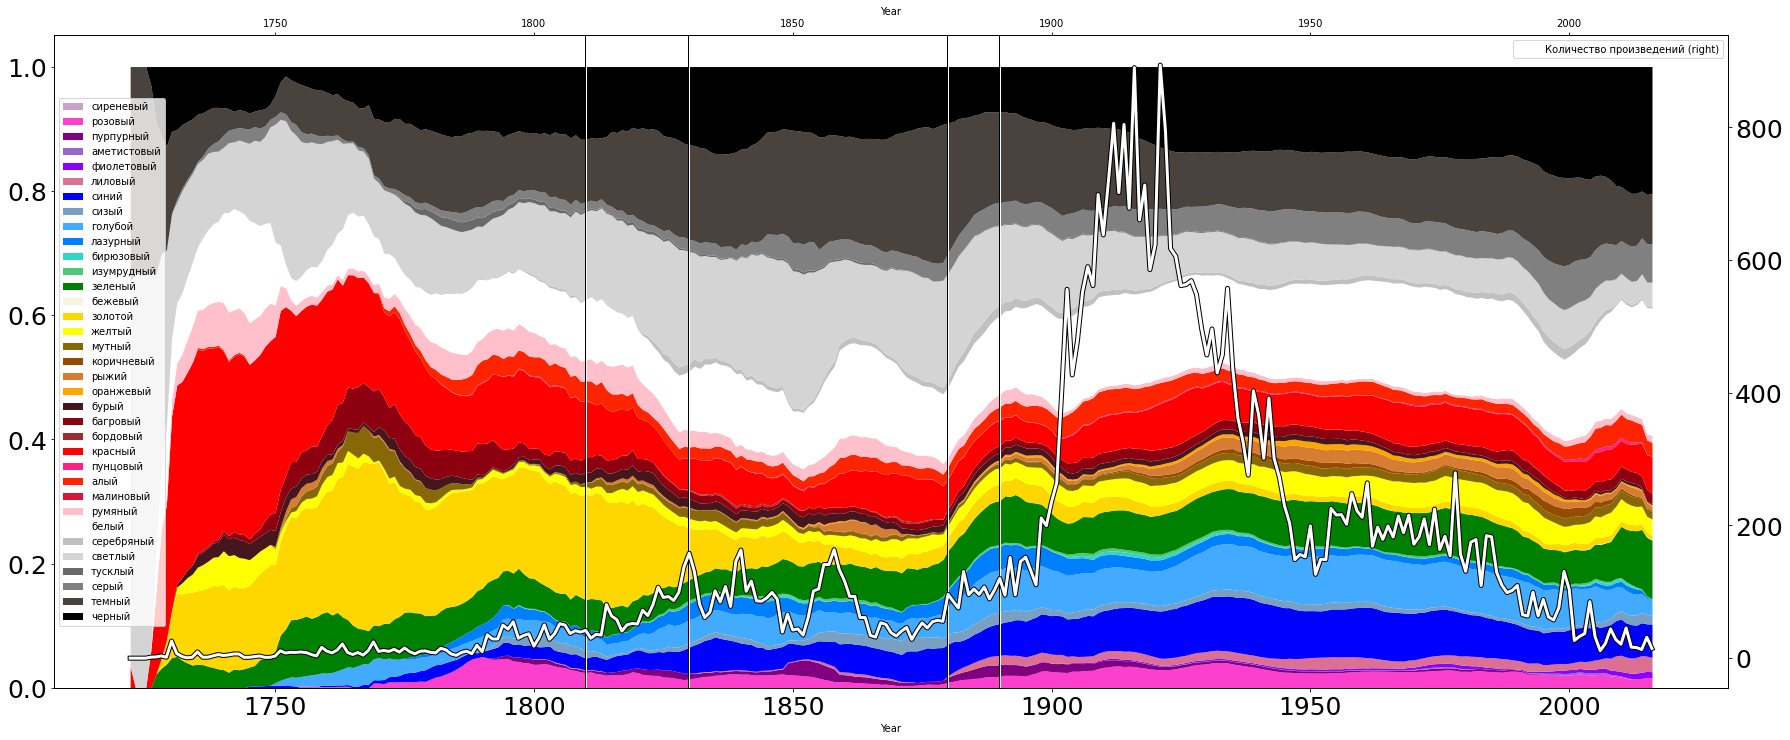

In [631]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 12

fig, ax = plt.subplots()
findf.plot.area(x='Year', y=col_names, color=[color_HEX_dictionary.get(x) for x in col_names], stacked=True, ax=ax, linewidth=0.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax2 = ax.twiny()
findf.plot(x='Year', color='black', y='Amount', ax=ax2, secondary_y=True, linewidth=5.0, label='Количество произведений')
findf.plot(x='Year', color='white', y='Amount', ax=ax2, secondary_y=True, linewidth=3.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

Major_Events = [
                1810, # Поэты пушкинской поры (Золотой век)
                1830,
                1880, # Серебряный век
                1890,
]
for year in Major_Events:
  ax.axvline(x=year, color='black', linewidth=2.0)
  ax.axvline(x=year, color='white', linewidth=1.0)

plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


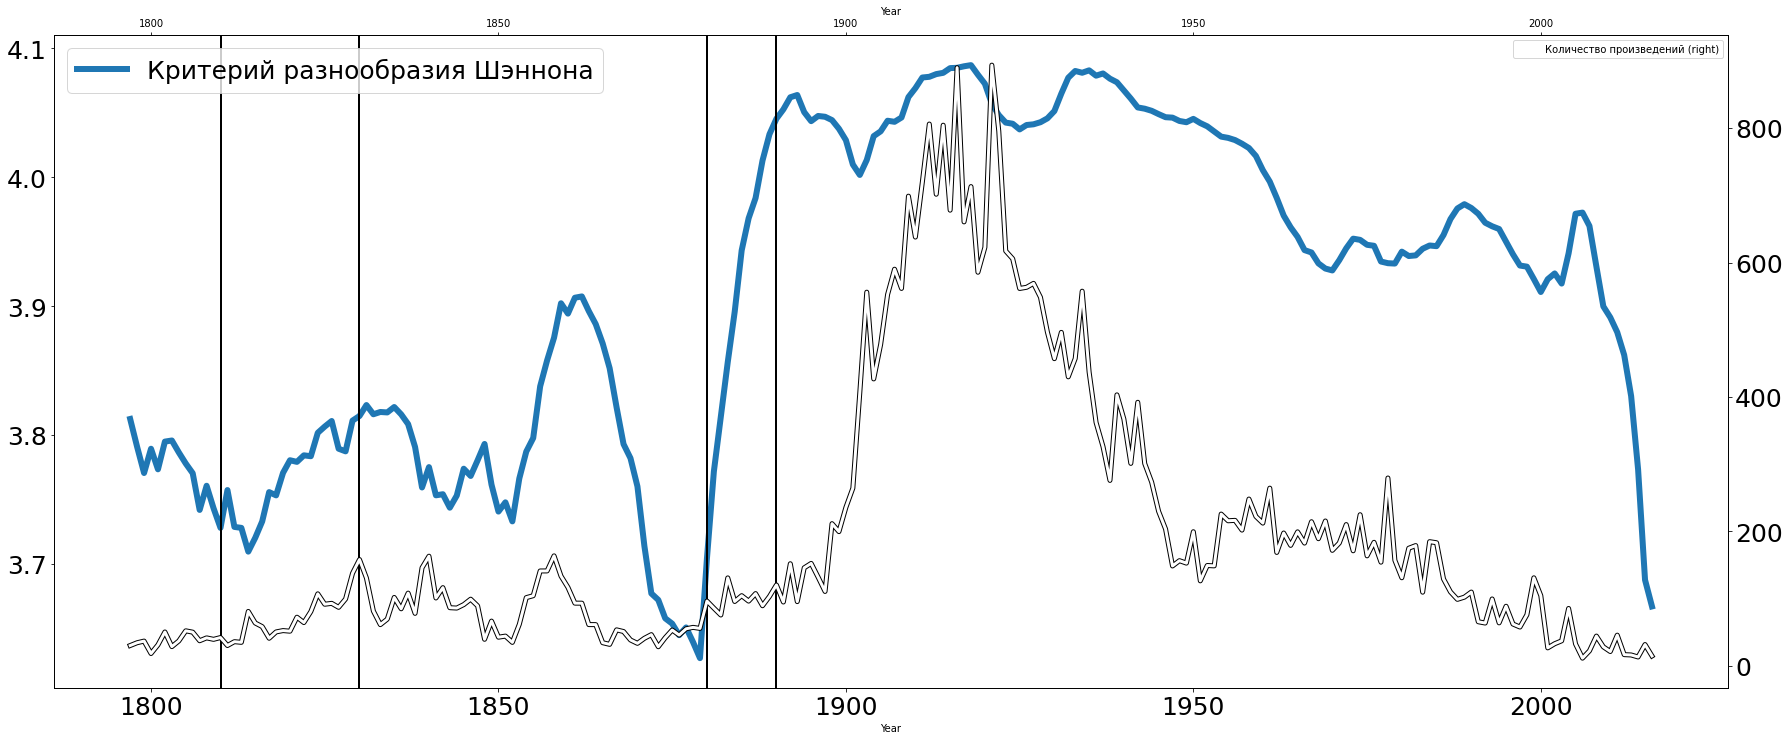

In [634]:
#Shannon Diversity Index
findf['diversity'] = findf[col_names].apply(lambda x : -(np.log2(x)*x).sum(), axis=1)

fig, ax = plt.subplots()

offset=75

findf[offset:].plot.line('Year', 'diversity', linewidth=6.0, ax=ax, label='Критерий разнообразия Шэннона')
ax.legend(loc = 'upper left', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.axvline(x=1810, color='black', linewidth=2.0)
plt.axvline(x=1830, color='black', linewidth=2.0)
plt.axvline(x=1880, color='black', linewidth=2.0)
plt.axvline(x=1890, color='black', linewidth=2.0)

ax2 = ax.twiny()
findf[offset:].plot(x='Year', color='black', y='Amount', ax=ax2, secondary_y=True, linewidth=5.0, label='Количество произведений')
findf[offset:].plot(x='Year', color='white', y='Amount', ax=ax2, secondary_y=True, linewidth=3.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
plt.show()

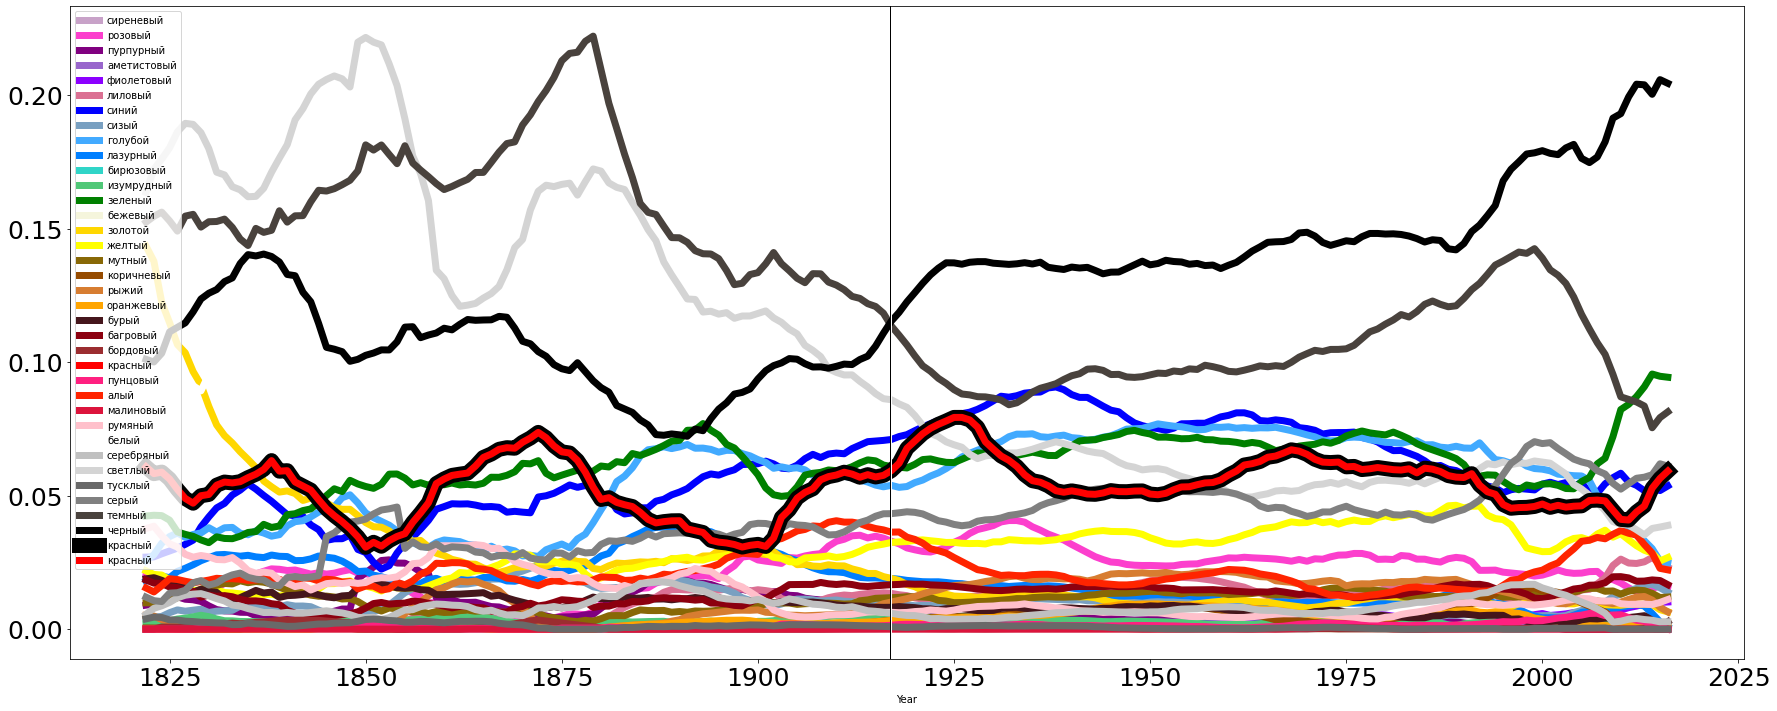

In [635]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 12

offset_a = 100

fig, ax = plt.subplots()
cols = col_names
findf[offset_a:].plot.line(x='Year', y=cols, color=[color_HEX_dictionary.get(x) for x in cols], ax=ax, linewidth=7.0)
cols = ['красный']
findf[offset_a:].plot.line(x='Year', y=cols, color='black', ax=ax, linewidth=15.0)
findf[offset_a:].plot.line(x='Year', y=cols, color=[color_HEX_dictionary.get(x) for x in cols], ax=ax, linewidth=7.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax.axvline(x=1917, color='black', linewidth=2.0)
ax.axvline(x=1917, color='white', linewidth=1.0)

plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
plt.show()

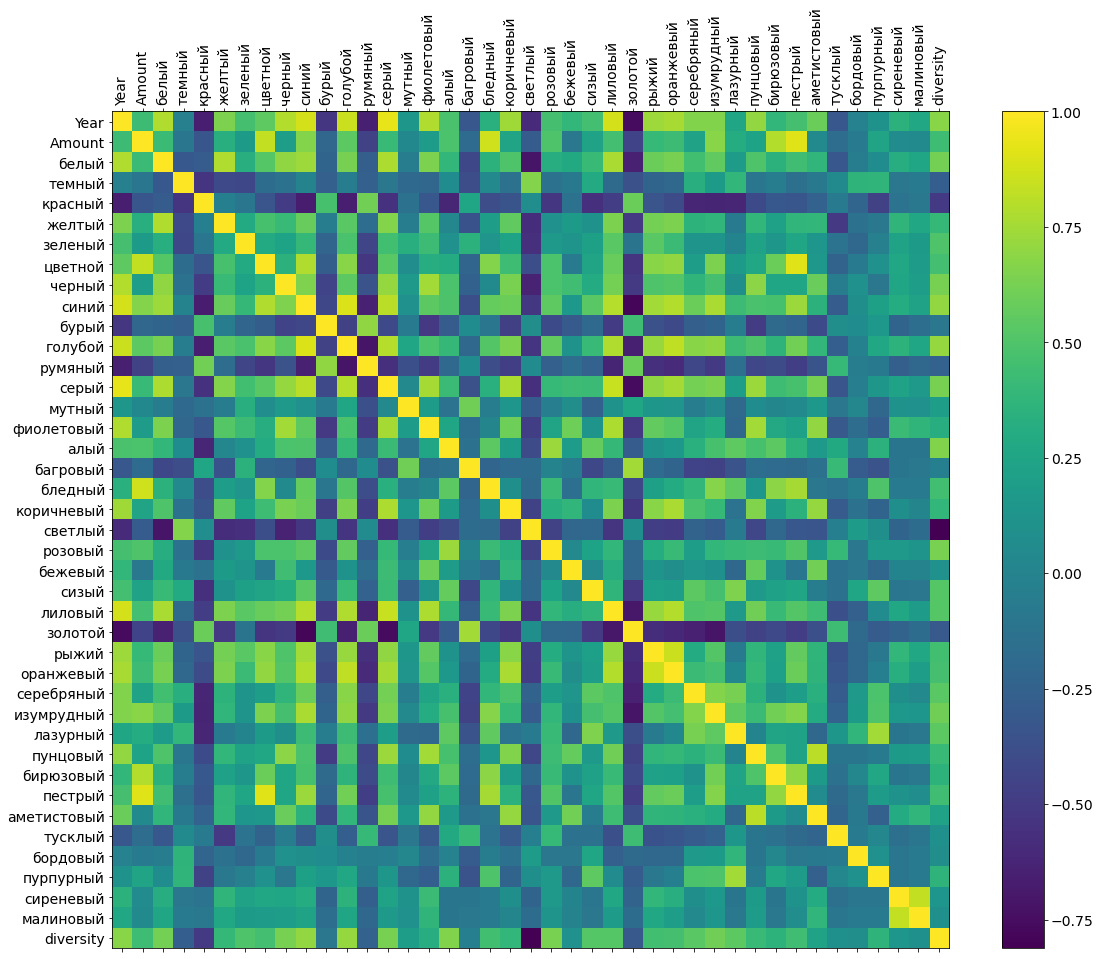

In [637]:
f = plt.figure(figsize=(19, 15))
plt.matshow(findf.corr(), fignum=f.number)
plt.xticks(range(findf.shape[1]), findf.columns, fontsize=14, rotation=90)
plt.yticks(range(findf.shape[1]), findf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)

In [638]:
# топ абсолютных корреляций

corr = findf.corr()
c1 = corr.abs().unstack()
top = c1.sort_values(ascending = False)[len(findf.columns)::2]
print(top[:15])

серый        Year         0.935278
Amount       пестрый      0.908073
пестрый      цветной      0.907991
синий        голубой      0.902877
             Year         0.881730
Year         лиловый      0.881260
бледный      Amount       0.870068
голубой      Year         0.858041
рыжий        оранжевый    0.854721
серый        лиловый      0.849375
цветной      Amount       0.832721
малиновый    сиреневый    0.831854
голубой      оранжевый    0.829669
аметистовый  пунцовый     0.813553
серый        синий        0.812234
dtype: float64


## Золото и серебро
Есть золотой и серебряный цвета. Интересно, зависят ли их относительные вхождения к историческим ценам серебра и золота?

У меня получилось найти цены только до 1968 года, к сожалению

In [639]:
golddf = pd.read_csv('/content/LBMA-GOLD.csv')
silverdf = pd.read_csv('/content/LBMA-SILVER.csv')
print(golddf.head(3))
print(silverdf.head(3))

         Date  USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
0  2020-12-21   1869.25   1880.00   1415.77   1413.57    1540.82    1539.53
1  2020-12-18   1878.95   1879.75   1390.80   1393.46    1533.41    1536.13
2  2020-12-17   1871.95   1890.75   1378.32   1390.65    1530.88    1542.85
         Date     USD    GBP   EURO
0  2020-12-21  26.155  19.71  21.51
1  2020-12-18  25.815  19.08  21.07
2  2020-12-17  25.740  18.91  21.03


In [640]:
price_df = golddf.merge(silverdf, how='inner', left_on='Date', right_on='Date')
price_df['GoldToSilver'] = price_df['USD (AM)'] / price_df['USD']
price_df['Year'] = pd.DatetimeIndex(price_df['Date']).year
price_df.drop(price_df.columns.difference(['Year','GoldToSilver']), 1, inplace=True)
price_df = price_df.groupby('Year')['GoldToSilver'].mean().reset_index()
print(price_df.head(2))
print(price_df.tail(2))

   Year  GoldToSilver
0  1968     17.845296
1  1969     22.939134
    Year  GoldToSilver
51  2019     86.070364
52  2020     89.407421


In [641]:
price_df = price_df.merge(findf, how='inner', left_on='Year', right_on='Year')
price_df['ЗолотоСеребро'] = price_df['золотой'] / price_df['серебряный']
price_df.drop(price_df.columns.difference(['Year','GoldToSilver','ЗолотоСеребро']), 1, inplace=True)
print(price_df.head(3))
print(price_df.tail(3))

   Year  GoldToSilver  ЗолотоСеребро
0  1968     17.845296       1.397436
1  1969     22.939134       1.436620
2  1970     20.441486       1.362319
    Year  GoldToSilver  ЗолотоСеребро
46  2014     66.716648       2.750000
47  2015     74.069656       2.666667
48  2016     73.373112       2.333333


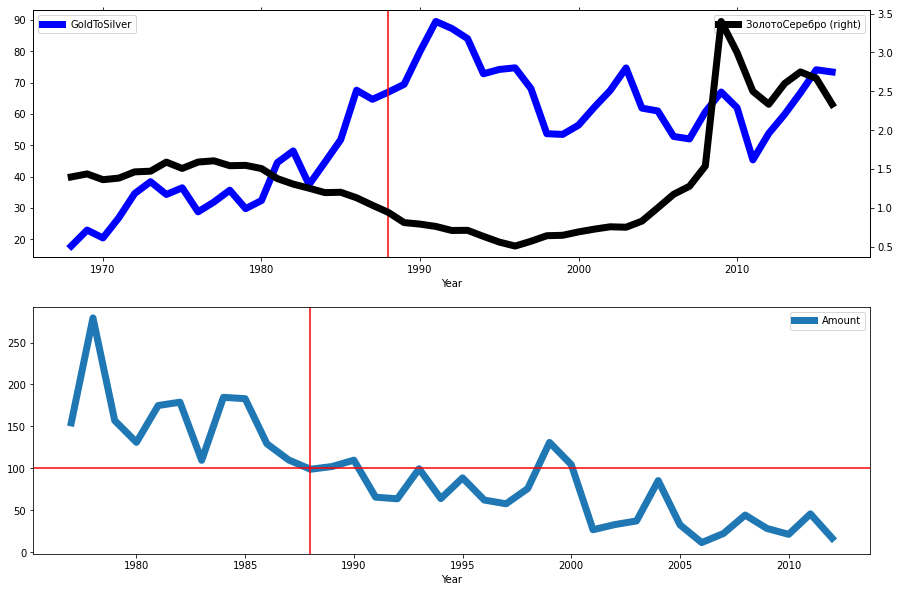

In [643]:
plt.rcParams['figure.figsize'] = 15, 10

fig, ax = plt.subplots(2,1)
price_df.plot.line(x='Year', color='blue', y='GoldToSilver', ax=ax[0], linewidth=7.0)
ax[0].legend( loc = 'upper left')

ax2 = ax[0].twiny()
price_df.plot(x='Year', color='black', y='ЗолотоСеребро', ax=ax2, secondary_y=True, linewidth=7.0)
ax[0].axvline(x=1988, color='r')

findf[255:-4].plot.line(x='Year', y='Amount', ax=ax[1], linewidth=7.0, legend='Количество произведений')
ax[1].axhline(y=100, color='r')
ax[1].axvline(x=1988, color='r')

plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
plt.show()

In [644]:
price_df.corr()

,Year,GoldToSilver,ЗолотоСеребро
Year,1.000000,0.656914,0.296861
GoldToSilver,0.656914,1.000000,-0.196534
ЗолотоСеребро,0.296861,-0.196534,1.000000


In [645]:
price_df[:-28].tail(3)

,Year,GoldToSilver,ЗолотоСеребро
18,1986,67.542238,1.129032
19,1987,64.653098,1.032967
20,1988,66.943520,0.941176


In [646]:
price_df[:-28].corr()

,Year,GoldToSilver,ЗолотоСеребро
Year,1.000000,0.876080,-0.676977
GoldToSilver,0.876080,1.000000,-0.771761
ЗолотоСеребро,-0.676977,-0.771761,1.000000


# Бонус: Визуализация одной книги
(данные из предыдущих шагов не нужны, только словари из самого начала)

In [2]:
def bonus_parse_book(book_url, print_colors=False):
  html = urlopen(book_url).read().decode('utf-8')
  soup = BeautifulSoup(html, "lxml")
  colors = [c.text.lower() for c in soup.find_all("span", class_="b-wrd-expl g-em")]

  lem_colors = []
  for color in colors:
    lemmatize(color)
    if (color not in skiplist):
      lem_colors.append(color_dictionary[color])

  if print_colors:
    print(lem_colors)

  for color in lem_colors:
    if color not in color_HEX_dictionary.keys():
      print(color, '— Значения HEX для этого цвета пока нет')
      hex = ""
      while len(hex)!=7 or hex[0]!='#':
        hex = input('Введите HEX-значение: ')
      color_HEX_dictionary[color] = hex

  hex_colors = [color_HEX_dictionary[c] for c in lem_colors]
  return hex_colors

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from matplotlib.pyplot import figure
from copy import deepcopy
from copy import deepcopy
from IPython.display import Image

def get_colors(book_url, print_colors=False):
  hex_colors = bonus_parse_book(book_url, print_colors=print_colors)
  hex_colors = [x for x in hex_colors if x is not None]
  #print(hex_colors)
  return hex_colors

def viz_mosaic(book_url, save_to, line_length=10, show=True, figsize=(8, 8)):
  hhex_colors = get_colors(book_url)

  side_1 = line_length
  # Дополняем конец белыми пикселями
  if len(hhex_colors) % side_1 != 0:
    hhex_colors.extend(['#ffffff'] * (side_1 - len(hhex_colors) % side_1))
  side_2 = len(hhex_colors) // side_1

  hhex_colors = to_rgba_array(hhex_colors).reshape(side_2,side_1,4)

  fig = figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
  plt.rcParams["axes.grid"] = False
  plt.axis('off')
  plt.imshow(hhex_colors)
  plt.savefig(save_to, bbox_inches='tight', pad_inches = 0)
  plt.close(fig)
  if show:
    return Image(filename='test.png')

def viz_line(book_url, save_to, show=True, pixels_long=50, figsize=(10, 20)):
  if isinstance(book_url, list):
    hhex_colors = []
    for b in book_url:
      hhex_colors += get_colors(b)
  else:
    hhex_colors = get_colors(book_url)
  hhex_colors = to_rgba_array(hhex_colors)

  # tile
  hhex_colors = hhex_colors.reshape(-1,len(hhex_colors),4)
  hhex_colors = np.repeat(hhex_colors, pixels_long, axis=0)

  fig = figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
  plt.tight_layout(pad=0)
  plt.rcParams["axes.grid"] = False
  plt.axis('off')
  plt.imshow(hhex_colors)
  plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)
  plt.close(fig)
  if show:
    return Image(filename='test.png')

In [4]:
Leo_Tolstoy_War_and_Peace_1 = "https://processing.ruscorpora.ru/search.xml?spp=50&text=lexgramm&level1=0&level2=0&api=1.0&spd=1&startyear=1800&mysize=451296&mysentsize=0&sem-mod2=sem&sem-mod2=sem2&sem-mod1=sem&sem-mod1=sem2&env=alpha&nodia=1&sem1=t%3Aphysq%3Acolor&parent2=0&sort=i_grtagging&mydocsize=4&min2=1&lang=ru&dpp=50&max2=1&mycorp=JSONeyJkb2NfaGVhZGVyIjogWyLQktC-0LnQvdCwINC4INC80LjRgCJdLCAiZG9jX2F1dGhvciI6IFsi0KLQvtC70YHRgtC-0LkiXX0%3D&endyear=2019&mode=main&parent1=0&docid=L3BsYWNlL3J1c2NvcnBvcmEvdGV4dHMvZmluYWxpemVkL21haW4vc291cmNlL3ByZTE5NTAveGl4L3RvbHN0b3lfbG4vdmltMS54bWwjMDAwMA=="
Leo_Tolstoy_War_and_Peace_2 = "https://processing.ruscorpora.ru/search.xml?spp=50&text=lexgramm&level1=0&level2=0&api=1.0&spd=1&startyear=1800&mysize=451296&mysentsize=0&sem-mod2=sem&sem-mod2=sem2&sem-mod1=sem&sem-mod1=sem2&env=alpha&nodia=1&sem1=t%3Aphysq%3Acolor&parent2=0&sort=i_grtagging&mydocsize=4&min2=1&lang=ru&dpp=50&max2=1&mycorp=JSONeyJkb2NfaGVhZGVyIjogWyLQktC-0LnQvdCwINC4INC80LjRgCJdLCAiZG9jX2F1dGhvciI6IFsi0KLQvtC70YHRgtC-0LkiXX0%3D&endyear=2019&mode=main&parent1=0&docid=L3BsYWNlL3J1c2NvcnBvcmEvdGV4dHMvZmluYWxpemVkL21haW4vc291cmNlL3ByZTE5NTAveGl4L3RvbHN0b3lfbG4vdmltMi54bWwjMDAwMA=="
Leo_Tolstoy_War_and_Peace_3 = "https://processing.ruscorpora.ru/search.xml?spp=50&text=lexgramm&level1=0&level2=0&api=1.0&spd=1&startyear=1800&mysize=451296&mysentsize=0&sem-mod2=sem&sem-mod2=sem2&sem-mod1=sem&sem-mod1=sem2&env=alpha&nodia=1&sem1=t%3Aphysq%3Acolor&parent2=0&sort=i_grtagging&mydocsize=4&min2=1&lang=ru&dpp=50&max2=1&mycorp=JSONeyJkb2NfaGVhZGVyIjogWyLQktC-0LnQvdCwINC4INC80LjRgCJdLCAiZG9jX2F1dGhvciI6IFsi0KLQvtC70YHRgtC-0LkiXX0%3D&endyear=2019&mode=main&parent1=0&docid=L3BsYWNlL3J1c2NvcnBvcmEvdGV4dHMvZmluYWxpemVkL21haW4vc291cmNlL3ByZTE5NTAveGl4L3RvbHN0b3lfbG4vdmltMy54bWwjMDAwMA=="
Leo_Tolstoy_War_and_Peace_4 = "https://processing.ruscorpora.ru/search.xml?spp=50&text=lexgramm&level1=0&level2=0&api=1.0&spd=1&startyear=1800&mysize=451296&mysentsize=0&sem-mod2=sem&sem-mod2=sem2&sem-mod1=sem&sem-mod1=sem2&env=alpha&nodia=1&sem1=t%3Aphysq%3Acolor&parent2=0&sort=i_grtagging&mydocsize=4&min2=1&lang=ru&dpp=50&max2=1&mycorp=JSONeyJkb2NfaGVhZGVyIjogWyLQktC-0LnQvdCwINC4INC80LjRgCJdLCAiZG9jX2F1dGhvciI6IFsi0KLQvtC70YHRgtC-0LkiXX0%3D&endyear=2019&mode=main&parent1=0&docid=L3BsYWNlL3J1c2NvcnBvcmEvdGV4dHMvZmluYWxpemVkL21haW4vc291cmNlL3ByZTE5NTAveGl4L3RvbHN0b3lfbG4vdmltNC54bWwjMDAwMQ=="
Aksakov_Alenkiy_Tsvetochek = "https://processing.ruscorpora.ru/search.xml?spp=50&text=lexgramm&level1=0&level2=0&api=1.0&spd=1&startyear=1800&mysize=2676649&mysentsize=0&sem-mod2=sem&sem-mod2=sem2&sem-mod1=sem&sem-mod1=sem2&env=alpha&nodia=1&sem1=t%3Aphysq%3Acolor&parent2=0&sort=i_grtagging&mydocsize=377&min2=1&lang=ru&dpp=50&max2=1&mycorp=JSONeyJkb2NfaV9sZV9zdGFydF95ZWFyIjogWyIxOTUwIl0sICJkb2NfZ2VucmVfZmkiOiBbItC00LXRgtGB0LrQsNGPIl19&endyear=2019&mode=main&parent1=0&docid=L3BsYWNlL3J1c2NvcnBvcmEvdGV4dHMvZmluYWxpemVkL21haW4vc3RhbmRhcmQvcHJlMTk1MC94aXgvYWtzYWtvdl9zdC9ha3Nha292XzMueG1sIzAwMDA="
Esenin_Chorny_Chelovek = "https://processing.ruscorpora.ru/search.xml?spp=50&text=lexgramm&level1=0&level2=0&endyear=2019&spd=10&startyear=1800&mysize=543&mysentsize=0&env=alpha&nodia=1&sem1=t%3Aphysq%3Acolor&parent2=0&sort=i_grtagging&mydocsize=1&min2=1&lang=ru&dpp=50&max2=1&mycorp=JSONeyJkb2NfaGVhZGVyIjogWyLRh9C10YDQvdGL0Lkg0YfQtdC70L7QstC10LoiXSwgImRvY19hdXRob3IiOiBbItC10YHQtdC90LjQvSJdfQ%3D%3D&ext=10&mode=poetic&parent1=0&docid=MTI4NDU4OA=="

In [5]:
# Ввести url
book_url = input()
book_url = Aksakov_Alenkiy_Tsvetochek

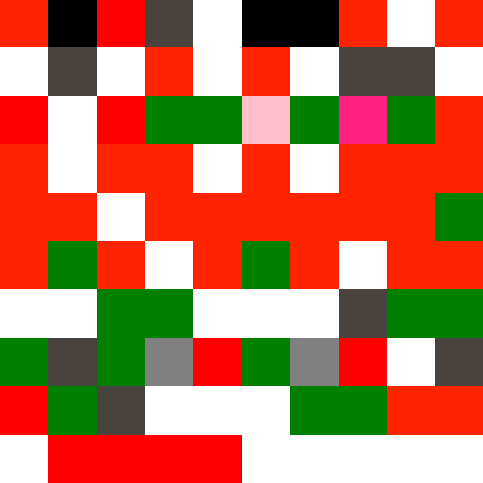

In [16]:
# Визуализация в виде мозаики.
# Цвета расположены слева направо, сверху вниз.
# В конец приписывается белое
viz_mosaic(book_url, save_to='test.png', line_length=10)

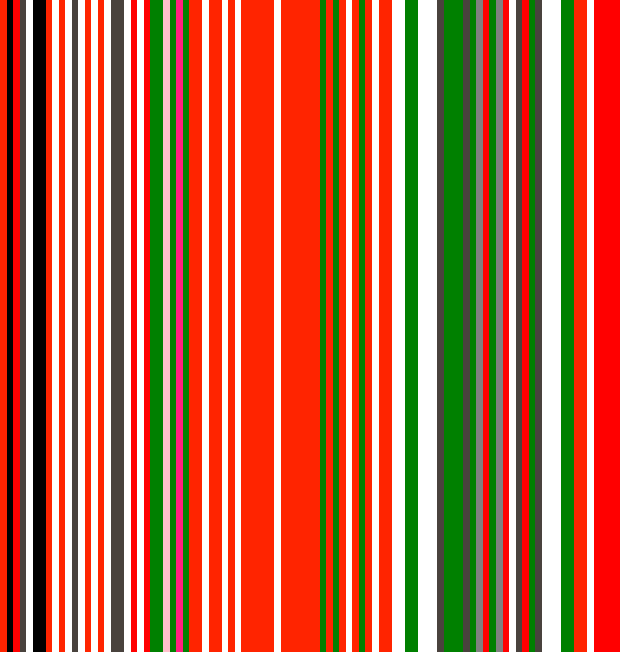

In [9]:
viz_line(book_url, save_to='test.png', pixels_long=100)

вороными — Этой словоформы цвета пока нет в словаре. Добавить или пропустить?
Сейчас есть такие, но можно добавить и новый: {'бледный', 'сиреневый', 'багровый', 'изумрудный', 'зеленый', 'фиолетовый', 'цветной', 'аметистовый', 'темный', 'лазурный', 'серый', 'бордовый', 'пестрый', 'бежевый', 'пурпурный', 'алый', 'рыжий', 'черный', 'лиловый', 'розовый', 'бирюзовый', 'коричневый', 'тусклый', 'румяный', 'серебряный', 'красный', 'бурый', 'пунцовый', 'синий', 'светлый', 'голубой', 'мутный', 'оранжевый', 'белый', 'малиновый', 'желтый', 'сизый', 'золотой'}
автоматически определено


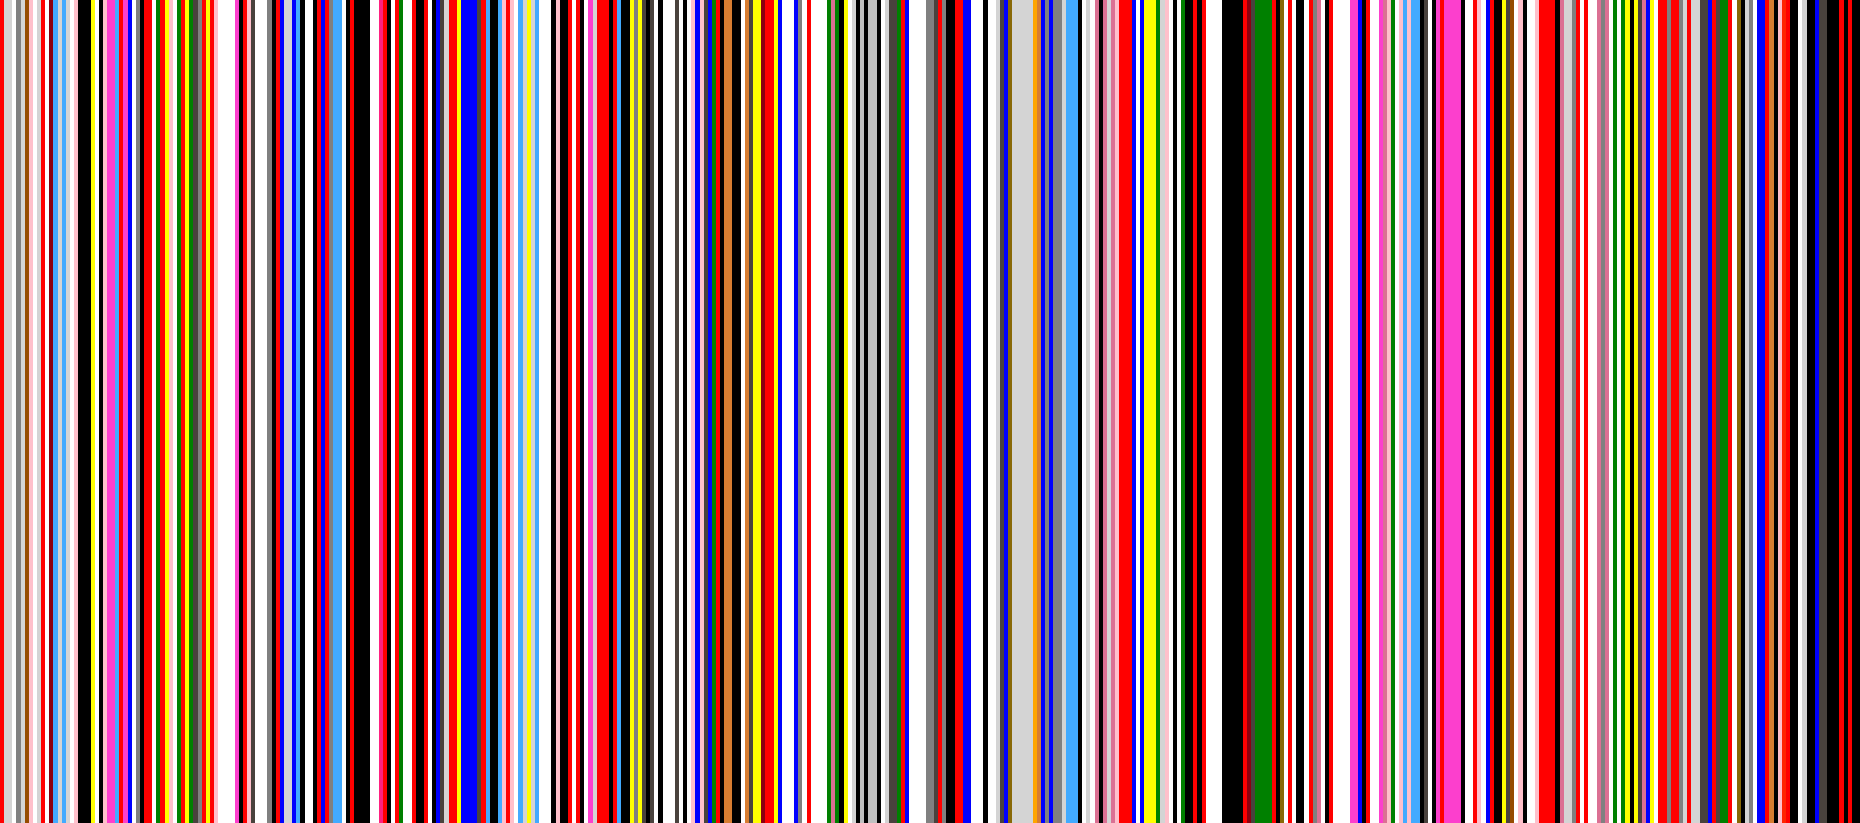

In [10]:
# Можно сразу несколько книг
War_and_Peace = [Leo_Tolstoy_War_and_Peace_1, Leo_Tolstoy_War_and_Peace_2, Leo_Tolstoy_War_and_Peace_3, Leo_Tolstoy_War_and_Peace_4]
# Визуализируем сразу все четыре тома Войны и мира
viz_line(War_and_Peace, save_to='test.png', pixels_long=200, figsize=(30,30))